In [1]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from feature_engine.creation import CyclicalFeatures
from sklearn.decomposition import PCA
from geopy.geocoders import Nominatim
import numpy as np
import pandas as pd
import re
import sys
import os
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn import FunctionSampler
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.model_selection import cross_validate, cross_val_score, KFold,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, auc, roc_auc_score, precision_recall_curve, make_scorer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from pandas_profiling import ProfileReport
from tqdm import tqdm
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
#from warnings import simplefilter
#from sklearn.exceptions import ConvergenceWarning
#simplefilter("ignore", category=ConvergenceWarning)
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

sklearn.exceptions.ConvergenceWarning('ignore')

In [2]:
from Class_Lib_for_Pipe import *
from Personal_ML_LIB import *

In [3]:
df   = pd.read_csv('Dataset/Kaggle-spaceship-titanic/train.csv')
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


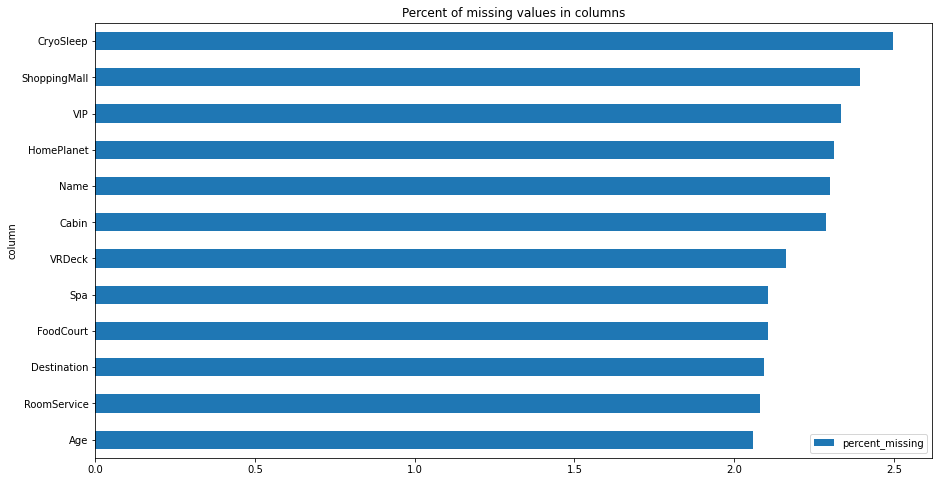

In [5]:
eda_class_starting = EDA(df)
eda_class_starting.plot_missing_values()
eda_class_starting.get_numerical_categorical()

In [6]:
class_imp_most_freq = ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=True)
df_imp_most_freq    = class_imp_most_freq.fit_transform(df)
df_imp_most_freq.head(2)

### ImputerMeanValue (fit) of  ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP'] , Shape of X :  (8693, 14)
### ImputerMeanValue (transform) of  ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP'] , Shape of X :  (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [7]:
class_imp_mean      = ImputatorMeanValue(["Age"], verbose=True)
df_imp_mean         = class_imp_mean.fit_transform(df_imp_most_freq)

### ImputatorMeanValue (fit) of  ['Age'] , Shape of X :  (8693, 14)
### ImputatorMeanValue (transform) of  ['Age'] , Shape of X :  (8693, 14)


In [8]:
class_ohe = LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=True)
df_ohe    = class_ohe.fit_transform(df_imp_mean)
df_ohe.head(2)

### LabelOneHotEncoder (fit) of  ['HomePlanet', 'Destination'] , Shape of X :  (8693, 14)
### LabelOneHotEncoder (tranform) of  ['HomePlanet', 'Destination'] , Shape of X :  (8693, 18)


,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Destination_0,Destination_1,Destination_2,HomePlanet_0,HomePlanet_1,HomePlanet_2
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,1,0,0
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,1,0


In [9]:
class_le = LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=True)
df_class_le    = class_le.fit_transform(df_ohe)
df_class_le.head(2)

### LabelOneHotEncoder (fit) of  ['CryoSleep', 'VIP'] , Shape of X :  (8693, 18)
### LabelOneHotEncoder (tranform) of  ['CryoSleep', 'VIP'] , Shape of X :  (8693, 18)


,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Destination_0,Destination_1,Destination_2,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep,VIP
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,1,0,0,0,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,1,0,0,0


In [10]:
class_split_string = SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = True)
df_split_string    = class_split_string.fit_transform(df_class_le)
df_split_string.head(2)

### SelectSubSTRING (fit) of  Cabin , Shape of X :  (8693, 18)
### SelectSubSTRING (transform) of  Cabin , Shape of X :  (8693, 21)


,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Destination_1,Destination_2,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep,VIP,Cabin_0,Cabin_1,Cabin_2
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,...,0,0,1,0,0,0,0,B,0,P
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,...,0,0,0,1,0,0,0,F,0,S


In [11]:
lista_fit = ["Destination_0","Destination_1","Destination_2","ShoppingMall","Spa","VRDeck","HomePlanet_0","HomePlanet_1","HomePlanet_2","CryoSleep","Age", "VIP"]
class_imp_from_model = ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = True)
df_imp_from_model = class_imp_from_model.fit_transform(df_split_string)
class_imp_from_model = ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = True)
df_imp_from_model = class_imp_from_model.fit_transform(df_split_string)
class_imp_from_model = ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = True)
df_imp_from_model = class_imp_from_model.fit_transform(df_split_string)
df_imp_from_model.head(2)

### ImputerNullWithModel (fit) of  ['Destination_0', 'Destination_1', 'Destination_2', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'CryoSleep', 'Age', 'VIP'] , Shape of X :  (8693, 21)
### ImputerNullWithModel (transform) of  ['Destination_0', 'Destination_1', 'Destination_2', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'CryoSleep', 'Age', 'VIP'] , Shape of X :  (8693, 21)
### ImputerNullWithModel (fit) of  ['Destination_0', 'Destination_1', 'Destination_2', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'CryoSleep', 'Age', 'VIP'] , Shape of X :  (8693, 21)
### ImputerNullWithModel (transform) of  ['Destination_0', 'Destination_1', 'Destination_2', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'CryoSleep', 'Age', 'VIP'] , Shape of X :  (8693, 21)
### ImputerNullWithModel (fit) of  ['Destination_0', 'Destination_1', 'Destination_2', 'ShoppingMall

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Destination_1,Destination_2,HomePlanet_0,HomePlanet_1,HomePlanet_2,CryoSleep,VIP,Cabin_0,Cabin_1,Cabin_2
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,...,0,0,1,0,0,0,0,B,0,P
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,...,0,0,0,1,0,0,0,F,0,S


In [12]:
print(len(df_imp_from_model["Cabin_0"].unique()))
print(len(df_imp_from_model["Cabin_1"].unique()))
print(len(df_imp_from_model["Cabin_2"].unique()))

8
1817
2


In [13]:
class_ohe = LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=True)
df_ohe    = class_ohe.fit_transform(df_imp_from_model)
class_ohe = LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=True)
df_ohe    = class_ohe.fit_transform(df_ohe)
df_ohe.head(2)

### LabelOneHotEncoder (fit) of  ['Cabin_0', 'Cabin_2'] , Shape of X :  (8693, 21)
### LabelOneHotEncoder (tranform) of  ['Cabin_0', 'Cabin_2'] , Shape of X :  (8693, 29)
### LabelOneHotEncoder (fit) of  ['Cabin_1'] , Shape of X :  (8693, 29)
### LabelOneHotEncoder (tranform) of  ['Cabin_1'] , Shape of X :  (8693, 29)


,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Cabin_0_1,Cabin_0_2,Cabin_0_3,Cabin_0_4,Cabin_0_5,Cabin_0_6,Cabin_0_7,Cabin_2_0,Cabin_2_1,Cabin_1
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,...,0,0,0,0,0,0,0,1,0,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,...,1,0,0,0,0,0,0,0,1,0


In [14]:
class_imputer_new_cat = ImputerNewCategory("Name", "Non Registrato", verbose=True)
df_imputer_new_cat    = class_imputer_new_cat.fit_transform(df_ohe)

### ImputerNewCategory (fit) of  Name , Shape of X :  (8693, 29)
### ImputerNewCategory (transform) of  Name , Shape of X :  (8693, 29)


In [15]:
class_LSA = LSA("Name", components = 10, verbose = True)
df_lsa    = class_LSA.fit_transform(df_imputer_new_cat)

### LSA (fit) of  Name , Shape of X :  (8693, 29)
### LSA (transform) of  Name , Shape of X :  (8693, 38)


In [16]:
class_le = LabelOneHotEncoder(["Transported"],onehot = False, verbose=True)
df_replace_value    = class_le.fit_transform(df_lsa)
df_replace_value.head(2)

### LabelOneHotEncoder (fit) of  ['Transported'] , Shape of X :  (8693, 38)
### LabelOneHotEncoder (tranform) of  ['Transported'] , Shape of X :  (8693, 38)


,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_0,Destination_1,...,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Name_10,Transported
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0.087400,0.153066,0.167841,0.196988,-0.090457,0.106046,0.401533,-0.062341,-0.847003,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,1,0,...,-0.217775,0.055773,0.214410,0.392253,-0.290534,0.066085,0.417454,0.685802,0.127514,1


In [17]:
class_drop_col = DropCol(["PassengerId", "Cabin"], verbose = True)
df_drop_col    = class_drop_col.fit_transform(df_replace_value)
df_drop_col.head(2)

### DropCol (fit) of  ['PassengerId', 'Cabin'] , Shape of X :  (8693, 38)
### DropCol (transform) of  ['PassengerId', 'Cabin'] , Shape of X :  (8693, 36)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_0,Destination_1,Destination_2,HomePlanet_0,...,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Name_10,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,...,0.087400,0.153066,0.167841,0.196988,-0.090457,0.106046,0.401533,-0.062341,-0.847003,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,-0.217775,0.055773,0.214410,0.392253,-0.290534,0.066085,0.417454,0.685802,0.127514,1


In [18]:
eda_class = EDA(df_drop_col)
eda_class.plot_missing_values()
eda_class.get_numerical_categorical()

No Missing Values are present in the Dataset


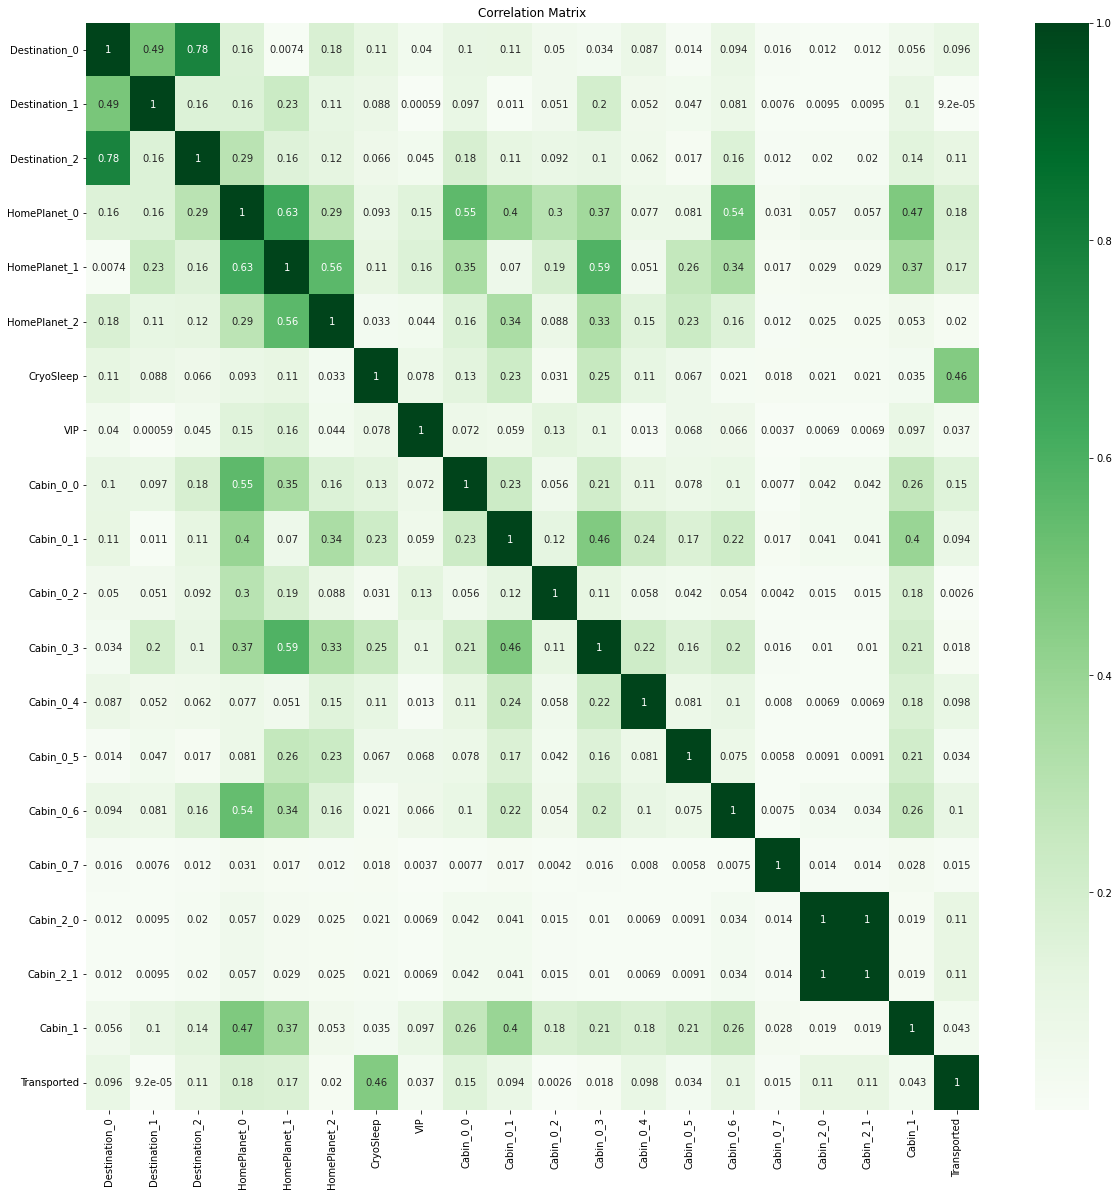

In [19]:
eda_class.plot_correlation_matrix(columns = eda_class.int_columns,figsize=(20,20))

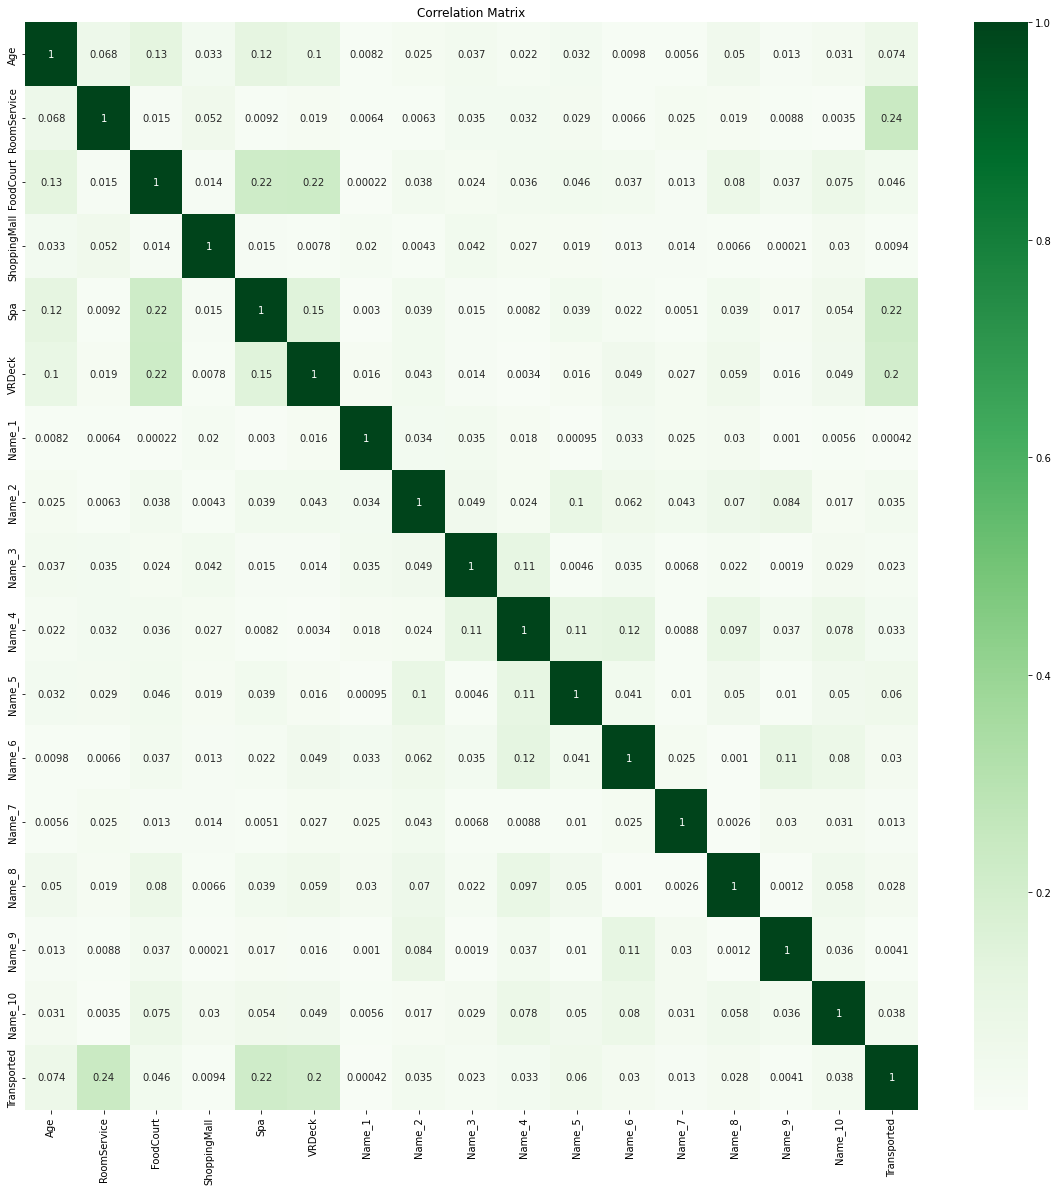

In [20]:
eda_class.plot_correlation_matrix(columns = eda_class.float_columns+["Transported"],figsize=(20,20))

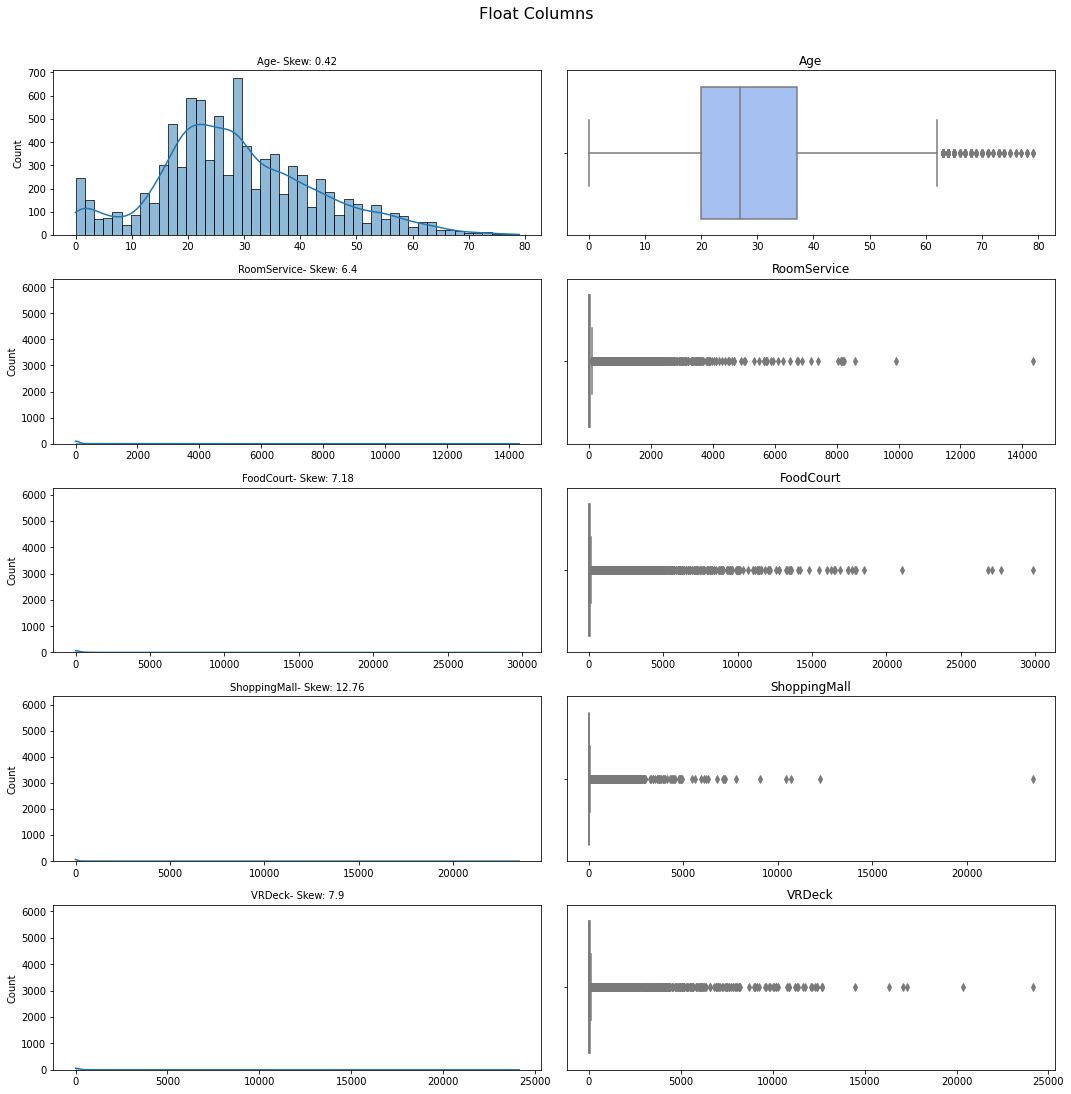

In [21]:
eda_class.plot_dist_boxplot(columns=["Age","RoomService","FoodCourt","ShoppingMall","VRDeck"],dist= True ,figsize=(15,15),kde=True, title="Float Columns")

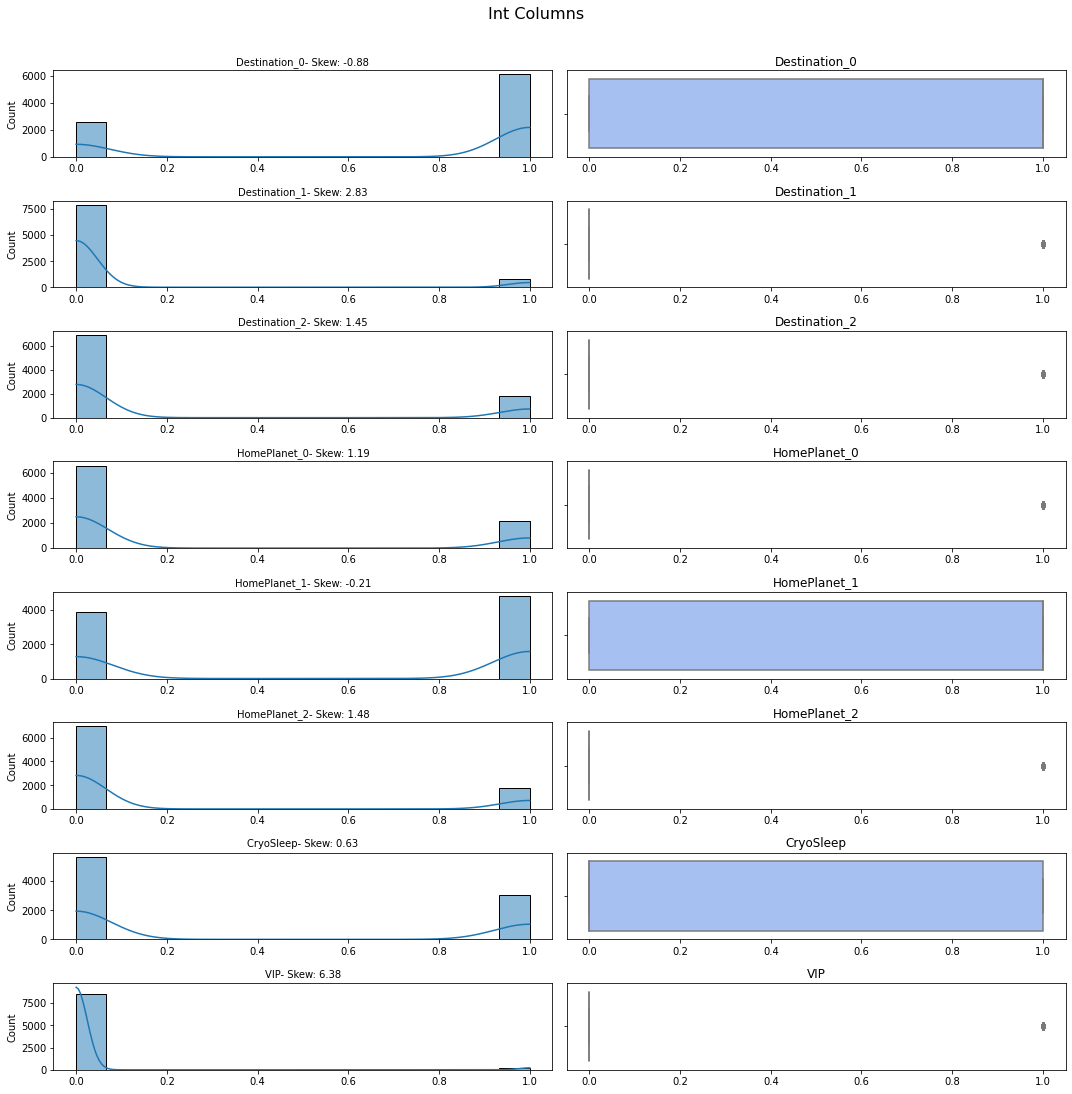

In [22]:
eda_class.plot_dist_boxplot(columns=["Destination_0","Destination_1","Destination_2","HomePlanet_0","HomePlanet_1","HomePlanet_2", "CryoSleep", "VIP"],dist= True ,figsize=(15,15),kde=True, title="Int Columns")

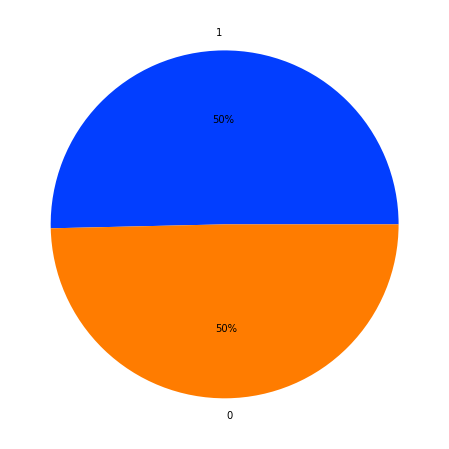

In [23]:
eda_class.plot_pie("Transported")

In [24]:
y = df["Transported"]
X = df.drop("Transported",axis=1)

In [25]:
lista_fit = ["Destination_0","Destination_1","Destination_2","ShoppingMall","Spa","VRDeck","HomePlanet_0","HomePlanet_1","HomePlanet_2","CryoSleep","Age", "VIP"]

In [26]:
pipe_lr = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ), 
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia = 60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia = 10, verbose=False) ),
( 'fs_PCA', FS_PCA(soglia = 90, verbose=False) ),
( 'clf', LogisticRegression(solver = 'liblinear') )
], verbose= False)

pipe_lr_out = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ),
( 'outlier', OutlierImputation_IQR(["Age","RoomService","FoodCourt","ShoppingMall","VRDeck"], factor = 1.5, method = "up_low") ),
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia = 60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia = 10, verbose=False) ),
( 'fs_PCA', FS_PCA(soglia = 90, verbose=False) ),
( 'clf', LogisticRegression(solver = 'liblinear') )
], verbose= False)

pipe_lr_out_NoPCA = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ),
( 'outlier', OutlierImputation_IQR(["Age","RoomService","FoodCourt","ShoppingMall","VRDeck"], factor = 1.5, method = "up_low") ),
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia = 60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia = 10, verbose=False) ),
( 'clf', LogisticRegression(solver = 'liblinear') )
], verbose= False)

pipe_knn = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ), 
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia=60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia=10,verbose=False) ),
( 'fs_PCA', FS_PCA(soglia= 90, verbose=False) ),
( 'clf', KNeighborsClassifier() ) 
], verbose= False)

pipe_dt = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ), 
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia=60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia=10,verbose=False) ),
( 'fs_PCA', FS_PCA(soglia = 90, verbose=False) ),
( 'clf', DecisionTreeClassifier(random_state = 42) ) 
], verbose= False)

pipe_rf = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ),  
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia=60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia=10,verbose=False) ),
( 'fs_PCA', FS_PCA(soglia = 90, verbose=False) ),
( 'clf', RandomForestClassifier(random_state = 42) ) 
], verbose= False)

pipe_rf_out = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ), 
( 'outlier', OutlierImputation_IQR(["Age","RoomService","FoodCourt","ShoppingMall","VRDeck"], factor = 1.5, method = "up_low") ),
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia=60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia=10,verbose=False) ),
( 'fs_PCA', FS_PCA(soglia = 90, verbose=False) ),
( 'clf', RandomForestClassifier(random_state = 42) ) 
], verbose= False)

pipe_rf_out_NoPCA = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ), 
( 'outlier', OutlierImputation_IQR(["Age","RoomService","FoodCourt","ShoppingMall","VRDeck"], factor = 1.5, method = "up_low") ),
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia=60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia=10,verbose=False) ),
( 'clf', RandomForestClassifier(random_state = 42) ) 
], verbose= False)

pipe_gb = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ),   
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia=60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia=10,verbose=False) ),
( 'fs_PCA', FS_PCA(soglia = 90, verbose=False) ),
( 'clf', GradientBoostingClassifier(random_state = 42) ) 
], verbose= False)

pipe_gb_out = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ),
( 'outlier', OutlierImputation_IQR(["Age","RoomService","FoodCourt","ShoppingMall","VRDeck"], factor = 1.5, method = "up_low") ),
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia=60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia=10,verbose=False) ),
( 'fs_PCA', FS_PCA(soglia = 90, verbose=False) ),
( 'clf', GradientBoostingClassifier(random_state = 42) ) 
], verbose= False)

pipe_gb_out_NoPCA = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ),
( 'outlier', OutlierImputation_IQR(["Age","RoomService","FoodCourt","ShoppingMall","VRDeck"], factor = 1.5, method = "up_low") ),
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia=60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia=10,verbose=False) ),
( 'clf', GradientBoostingClassifier(random_state = 42) ) 
], verbose= False)

pipe_mlp_out = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ),
( 'outlier', OutlierImputation_IQR(["Age","RoomService","FoodCourt","ShoppingMall","VRDeck"], factor = 1.5, method = "up_low") ),
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia=60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia=10,verbose=False) ),
( 'fs_PCA', FS_PCA(soglia = 90, verbose=False) ),
( 'fs_std_02', Standardize()),
( 'clf', MLPClassifier(hidden_layer_sizes=(50,) ) ) 
], verbose= False)

pipe_mlp_out_NoPCA = Pipeline(steps = [
( 'imp_most_freq', ImputatorMostFreqValue(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","HomePlanet","CryoSleep","Destination","VIP"],verbose=False) ),
( 'imp_mean_01', ImputatorMeanValue(["Age"], verbose=False) ),
( 'ohe_01', LabelOneHotEncoder(["HomePlanet","Destination"],onehot = True, verbose=False) ),
( 'le_01', LabelOneHotEncoder(["CryoSleep","VIP"],onehot = False, verbose=False) ),
( 'imp_mean_02', ImputatorMeanValue(["Age"], verbose=False) ),
( 'sel_sub_string', SelectSubSTRING("Cabin", sep = "/", index_list = [0,1,2], verbose = False) ),    
( 'imp_model_01', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_0", lista_fit, verbose = False) ),    
( 'imp_model_02', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_1", lista_fit, verbose = False) ),
( 'imp_model_03', ImputerNullWithModel(DecisionTreeClassifier(max_depth=5), "Cabin_2", lista_fit, verbose = False) ),
( 'ohe_02', LabelOneHotEncoder(["Cabin_0","Cabin_2"],onehot = True, verbose=False) ),
( 'le_02', LabelOneHotEncoder(["Cabin_1"],onehot = False, verbose=False) ),
( 'imp_new_cat', ImputerNewCategory("Name", "Non Registrato", verbose=False) ),
( 'lsa', LSA("Name", components = 10, verbose = False) ),
( 'drop_col', DropCol(["PassengerId", "Cabin"], verbose = False) ),
( 'outlier', OutlierImputation_IQR(["Age","RoomService","FoodCourt","ShoppingMall","VRDeck"], factor = 1.5, method = "up_low") ),
( 'fs_std', Standardize()),
( 'fs_corr_noy', FSCorrMatryxByValue_NoY(soglia=60,verbose=False) ),
( 'fs_corr', FSCorrMatryxByValue(soglia=10,verbose=False) ),
( 'clf', MLPClassifier(hidden_layer_sizes=(100,) ) ) 
], verbose= False)

In [27]:
def get_PR_AUC(y_true,y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    return auc(recall,precision)

pipelines = {
    'knn'            : pipe_knn,
    'lr'             : pipe_lr,
    'lr_var'         : pipe_lr_out,
    'lr_var_NoPCA'   : pipe_lr_out_NoPCA,
    'dt'             : pipe_dt,
    'rf'             : pipe_rf,
    'rf_var'         : pipe_rf_out,
    'rf_var_NoPCA'   : pipe_rf_out_NoPCA,
    'gb'             : pipe_gb,
    'gb_var'         : pipe_gb_out,
    'gb_var_NoPCA'   : pipe_gb_out_NoPCA,
    'gb_var_NoPCA'   : pipe_gb_out_NoPCA,
    'mlp_var'        : pipe_mlp_out,
    'mlp_var_NoPCA'  : pipe_mlp_out_NoPCA
}

metrics = {
    'Accuracy'  : make_scorer(accuracy_score),
    'ROC_AUC'   :'roc_auc',
    'PR_AUC'    : make_scorer(get_PR_AUC),#, greater_is_better=True),
    'PRECISION' : 'precision',
    'RECALL'    : 'recall'
}

hyper_param = { 'knn'          : {'clf__n_neighbors' : [2,3,4,5,6],
                                  'clf__leaf_size'   : [5,10,20,30]
                                 },
               
                'lr'           : {},

                'lr_var'       : {'outlier__factor'     : [1.0,1.5,2.0],
                                  'outlier__method'     : ["mean","most_freq","up_low"],
                                  'fs_corr__soglia'     : [5,10,15],
                                  'fs_corr_noy__soglia' : [60,70],
                                  'fs_PCA__soglia'      : [70,80,90]
                                  },
               
                'lr_var_NoPCA' : {'outlier__factor'     : [1.0,1.5,2.0],
                                  'outlier__method'     : ["mean","most_freq","up_low"],
                                  'fs_corr__soglia'     : [5,10,15],
                                  'fs_corr_noy__soglia' : [60,70]
                                 },
               
                'dt'           : {'clf__max_depth' : [6,8,10,20,50,100],
                                  'clf__criterion' : ['gini', 'entropy']
                                 },
               
                'rf'           : {'clf__n_estimators' :[10, 20, 30, 50, 100],
                                  'clf__max_depth'    : [2,4,6,8,10,20]
                                 }, 
               
                'rf_var'       : {'clf__n_estimators'   : [10, 20, 30, 50, 100],
                                  'clf__max_depth'      : [2,4,6,8,10,20],
                                  'fs_corr__soglia'     : [5,10,15],
                                  'fs_corr_noy__soglia' : [60,70],
                                  'fs_PCA__soglia'      : [70,80,90]                                  
                                 },
               
                'rf_var_NoPCA' : {'clf__n_estimators'   : [10, 20, 30, 50, 100],
                                  'clf__max_depth'      : [2,4,6,8,10,20],
                                  'fs_corr__soglia'     : [5,10,15],
                                  'fs_corr_noy__soglia' : [60,70],
                                 },
               
                'gb'           : {'clf__n_estimators' :[10, 20, 30, 50],
                                  'clf__max_depth'    : [2,4,6,8,10,20]
                                 },   

               
                'gb_var'       : {'clf__n_estimators'   :[10, 20, 30, 50],
                                  'clf__max_depth'      : [2,4,6,8,10,20],
                                  'outlier__method'     : ["mean","most_freq","up_low"],
                                  'outlier__factor'     : [1.0,1.5,2.0],
                                  'fs_corr__soglia'     : [5,10,15],
                                  'fs_corr_noy__soglia' : [60,70],
                                  'fs_PCA__soglia'      : [70,80,90]
                                 },
               
                'gb_var_NoPCA' : {'clf__n_estimators'   :[10, 20, 30, 50],
                                  'clf__max_depth'      : [2,4,6,8,10,20],
                                  'outlier__method'     : ["mean","most_freq","up_low"],
                                  'outlier__factor'     : [1.0,1.5,2.0],
                                  'fs_corr__soglia'     : [5,10,15],
                                  'fs_corr_noy__soglia' : [60,70],
                                  },
               
               
                'mlp_var'      : {'clf__hidden_layer_sizes': [(100,),(100,100,),(50,50,50,),(100,100,100,)],
                                  'clf__activation'        : ['relu','tanh'],
                                  'outlier__method'     : ["mean","most_freq","up_low"],
                                  'outlier__factor'     : [1.0,1.5,2.0],
                                  'fs_corr__soglia'        : [5,10,15],
                                  'fs_corr_noy__soglia'    : [60,70],
                                  'fs_PCA__soglia'         : [70,80,90]
                                 },
               
                'mlp_var_NoPCA': {'clf__hidden_layer_sizes': [(100,),(100,100,),(50,50,50,),(100,100,100,)],
                                  'clf__activation'        : ['relu','tanh'],
                                  'outlier__method'     : ["mean","most_freq","up_low"],
                                  'outlier__factor'     : [1.0,1.5,2.0],
                                  'fs_corr__soglia'        : [5,10,15],
                                  'fs_corr_noy__soglia'    : [60,70],
                                 },
}

In [28]:
judge = Judge(innercycle = 3, outercycle = 3)
judge.set_data(X, y).set_algorithms(pipelines).set_metrics(metrics).set_research("ROC_AUC", "Random")
judge.set_diz_hyper_param(hyper_param)

In [29]:
%%time
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"
    
print(f"In this case the REFIT is : '{judge.refit}' while the ParameterSearch is : '{judge.grid}' ")
judge.get_comparison_table()

In this case the REFIT is : 'ROC_AUC' while the ParameterSearch is : 'Random' 
CPU times: user 167 ms, sys: 87.2 ms, total: 255 ms
Wall time: 5min 39s


,Accuracy,ROC_AUC,PR_AUC,PRECISION,RECALL
knn,75.28,83.03,81.67,76.13,74.23
lr,75.00,83.75,82.10,81.51,65.14
lr_var,76.27,84.05,82.50,78.01,73.78
lr_var_NoPCA,77.32,85.36,83.12,76.49,79.35
dt,78.03,85.24,83.71,74.68,85.36
rf,78.60,86.19,84.04,76.28,83.46
rf_var,76.53,84.64,82.58,77.02,76.13
rf_var_NoPCA,77.23,85.10,83.07,76.62,78.89
gb,78.33,86.24,83.84,76.23,82.77
gb_var,75.72,83.66,82.07,77.35,73.40


## Production Model

In [30]:
clf_prod   = GridSearchCV(pipe_gb, param_grid=hyper_param['gb'], cv=5)
clf_prod.fit(X, y)
clf_prod.best_estimator_

Pipeline(steps=[('imp_most_freq',
                 ImputatorMostFreqValue(columns=['RoomService', 'FoodCourt',
                                                 'ShoppingMall', 'Spa',
                                                 'VRDeck', 'HomePlanet',
                                                 'CryoSleep', 'Destination',
                                                 'VIP'])),
                ('imp_mean_01', ImputatorMeanValue(column=['Age'])),
                ('ohe_01',
                 LabelOneHotEncoder(categorical_features=['HomePlanet',
                                                          'Destination'])),
                ('le_01',
                 LabelOneHotEncoder(categorical_features=...
                 ImputerNewCategory(category='Non Registrato', column='Name')),
                ('lsa', LSA(column='Name', components=10)),
                ('drop_col', DropCol(columns=['PassengerId', 'Cabin'])),
                ('fs_std', Standardize()),
                ('fs_

In [31]:
# save the model to disk
import pickle
filename = 'space_titanic_prod_model.pickle'
pickle.dump(clf_prod, open(filename, 'wb'))